In [15]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [37]:
# Use laptop dataset from Kaggle
df = pd.read_csv('/workspaces/machine_learning_zoomcamp/laptops.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
strings = list(df.dtypes[df.dtypes == 'object'].index)
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [38]:
df

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,NaN,15.6,no,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,16,1000,ssd,rtx_3060,17.3,no,2699.99
2156,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,16,1000,ssd,rtx_3070,17.3,no,2899.99
2157,razer_blade_17_fhd_360hz_intel_core_i7-11800h/...,refurbished,razer,blade,intel_core_i7,32,1000,ssd,rtx_3080,17.3,no,3399.99
2158,razer_book_13_intel_evo_core_i7-1165g7/16gb/1t...,refurbished,razer,book,intel_evo_core_i7,16,1000,ssd,NaN,13.4,yes,1899.99


#### Question-1

In [131]:
df.isnull().sum()
print('The null column is screen')

The null column is screen


#### Question-2

In [23]:
print('Median Value for RAM is ' + str(df['ram'].median()))

Median Value for RAM is 16.0


#### Question-3

In [94]:
# Used data for analysis
df_n = df.drop(['laptop','status','brand','model','cpu','storage_type','touch','gpu'],axis=1)
df_n.head(3)

,ram,storage,screen,final_price
0,8,512,15.6,1009.0
1,8,256,15.6,299.0
2,8,256,15.6,789.0


In [96]:
df_n.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [106]:
base = ['ram', 'storage', 'screen']

In [125]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [108]:
# Splitting the dataset
np.random.seed(42)

n = len(df_n)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_n.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

n_val, n_test, n_train

(432, 432, 1296)

In [109]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [110]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [111]:
y_train_orig = df_train.final_price.values
y_val_orig = df_val.final_price.values
y_test_orig = df_test.final_price.values

y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [112]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [113]:
# Generate X_train, X_val, X_test witl Fillna 0
X_train_0 = prepare_X(df_train)
X_val_0 = prepare_X(df_val)
X_test_0 = prepare_X(df_test)

In [114]:
X_train_0

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]])

In [115]:
w_0, w = train_linear_regression(X_train_0, y_train)
y_pred = w_0 + X_train_0.dot(w)

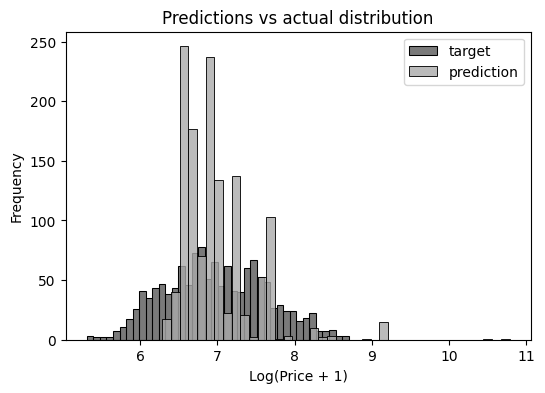

In [116]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [117]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [118]:
rmse(y_train, y_pred)

np.float64(0.44632651855038796)

In [119]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [120]:
rmse(y_val, y_pred)

np.float64(0.4288635315474416)

In [122]:
# Train with mean
# Generate X_train, X_val, X_test witl Fillna 0
X_train_m = prepare_X(df_train)
w_0, w = train_linear_regression(X_train_m, y_train)
y_pred = w_0 + X_train_m.dot(w)

In [123]:
rmse(y_train, y_pred)

np.float64(0.4460856669097624)

#### Question-4

In [124]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [126]:
X_train = prepare_X(df_train)

In [128]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f' % (r, w_0))

    0, 6.73
 0.01, 6.72
  0.1, 6.67
    1, 6.16
    5, 4.62
   10, 3.52
  100, 0.68


In [130]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

    y_pred = w_0 + X_train.dot(w)
    train_rmse = rmse(y_train, y_pred)

    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    val_rmse = rmse(y_val, y_pred)

    print(f"r = {r}: Train RMSE = {train_rmse:.2f}, Validation RMSE = {val_rmse:.2f}")

r = 0: Train RMSE = 0.45, Validation RMSE = 0.43
r = 0.01: Train RMSE = 0.45, Validation RMSE = 0.43
r = 0.1: Train RMSE = 0.45, Validation RMSE = 0.43
r = 1: Train RMSE = 0.45, Validation RMSE = 0.43
r = 5: Train RMSE = 0.49, Validation RMSE = 0.46
r = 10: Train RMSE = 0.53, Validation RMSE = 0.51
r = 100: Train RMSE = 0.71, Validation RMSE = 0.67


#### Question-5

In [133]:
# Splitting the dataset
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Lists to store RMSE values for each seed
train_rmse_list = []
val_rmse_list = []

# Loop over multiple seeds
for s in seed:
    np.random.seed(s)

    n = len(df_n)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df_n.iloc[idx]
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
    df_test = df_shuffled.iloc[n_train + n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values

    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)

    # Train model and calculate RMSE
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred_train = w_0 + X_train.dot(w)
    train_rmse = rmse(y_train, y_pred_train)

    y_pred_val = w_0 + X_val.dot(w)
    val_rmse = rmse(y_val, y_pred_val)

    # Append RMSE results to lists
    train_rmse_list.append(train_rmse)
    val_rmse_list.append(val_rmse)

    print(f"Seed = {s}: Train RMSE = {train_rmse:.2f}, Validation RMSE = {val_rmse:.2f}")

# Calculate the standard deviation of RMSE values
train_rmse_std = np.std(train_rmse_list)
val_rmse_std = np.std(val_rmse_list)

print(f"\nStandard Deviation of Train RMSE across seeds: {train_rmse_std:.2f}")
print(f"Standard Deviation of Validation RMSE across seeds: {val_rmse_std:.2f}")

Seed = 0: Train RMSE = 602.88, Validation RMSE = 565.45
Seed = 1: Train RMSE = 581.03, Validation RMSE = 636.80
Seed = 2: Train RMSE = 591.11, Validation RMSE = 588.96
Seed = 3: Train RMSE = 576.90, Validation RMSE = 597.81
Seed = 4: Train RMSE = 590.65, Validation RMSE = 571.96
Seed = 5: Train RMSE = 603.65, Validation RMSE = 573.24
Seed = 6: Train RMSE = 588.46, Validation RMSE = 647.34
Seed = 7: Train RMSE = 590.66, Validation RMSE = 550.44
Seed = 8: Train RMSE = 563.29, Validation RMSE = 587.33
Seed = 9: Train RMSE = 591.38, Validation RMSE = 576.10

Standard Deviation of Train RMSE across seeds: 11.33
Standard Deviation of Validation RMSE across seeds: 29.18


#### Question-6

In [135]:
# Splitting the dataset
np.random.seed(9)

n = len(df_n)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_n.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_train = pd.concat([df_train,df_val])
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [136]:
# Generate X_train, X_val, X_test witl Fillna 0
X_train = prepare_X(df_train)
X_test = prepare_X(df_test)

In [137]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [139]:
y_train = df_train.final_price.values
y_test = df_test.final_price.values

w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

# Prediction on data train
y_pred = w_0 + X_train.dot(w)
train_rmse = rmse(y_train, y_pred)

# Prediction on data test
y_pred_test = w_0 + X_test.dot(w)
test_rmse = rmse(y_test, y_pred_test)
test_rmse

np.float64(608.609982204956)